In [1]:
import pandas as pd


df = pd.read_csv('/content/user_review.csv')

# Display the first few rows of the dataframe to understand its structure
print(df.head()) # to display first five lines
print(df.tail()) # to display last five lines
print(df) # to display entire data frame

   id                                             review
0   1  I love this app! It is so useful and easy to use.
1   2  Terrible experience. The app crashes all the t...
2   3        Decent app but needs improvement in the UI.
3   4           Fantastic! This app has changed my life.
4   5       The app is okay, but it lacks many features.
    id                                  review
45  46               Helpful customer support.
46  47  The app doesn’t have enough tutorials.
47  48  Fantastic performance and reliability.
48  49           I wouldn’t use any other app.
49  50          The app could use a dark mode.
    id                                             review
0    1  I love this app! It is so useful and easy to use.
1    2  Terrible experience. The app crashes all the t...
2    3        Decent app but needs improvement in the UI.
3    4           Fantastic! This app has changed my life.
4    5       The app is okay, but it lacks many features.
5    6                Worst 

In [2]:
# Cleaning the data- remove null values
df = df.dropna()
df = df[['review']]

In [3]:
# Perfoming basic text processing
import re
import string
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply preprocessing
df['review'] = df['review'].apply(preprocess_text)
print(df)

                                               review
0     i love this app it is so useful and easy to use
1    terrible experience the app crashes all the time
2          decent app but needs improvement in the ui
3              fantastic this app has changed my life
4          the app is okay but it lacks many features
5                   worst app ever it is full of bugs
6     excellent functionality and userfriendly design
7   not bad but there are better alternatives out ...
8   im very satisfied with this app highly recomme...
9           the app is slow and unresponsive at times
10             good app but it could use some updates
11  i had a bad experience the customer support is...
12           amazing app very intuitive and efficient
13                 its an average app nothing special
14   ive been using this app for months and i love it
15     disappointed the app doesnt work as advertised
16    pretty good app but theres room for improvement
17             i wouldnt rec

In [4]:
# Analyzing the sentiment of each review by using Sentiment Analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon if not already done
nltk.download('vader_lexicon')

# Function inorder to get sentiment
def get_sentiment(review):
    sid = SentimentIntensityAnalyzer()
# Get the sentiment scores
    scores = sid.polarity_scores(review)
    # Determine the sentiment category
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return  'negative'
    else:
        return 'neutral'
# Applying sentiment analysis
df['sentiment'] = df['review'].apply(get_sentiment)
print(df)




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                               review sentiment
0     i love this app it is so useful and easy to use  positive
1    terrible experience the app crashes all the time  negative
2          decent app but needs improvement in the ui  positive
3              fantastic this app has changed my life  positive
4          the app is okay but it lacks many features  positive
5                   worst app ever it is full of bugs  negative
6     excellent functionality and userfriendly design  positive
7   not bad but there are better alternatives out ...  positive
8   im very satisfied with this app highly recomme...  positive
9           the app is slow and unresponsive at times   neutral
10             good app but it could use some updates  positive
11  i had a bad experience the customer support is...  negative
12           amazing app very intuitive and efficient  positive
13                 its an average app nothing special  negative
14   ive been using this app for months 

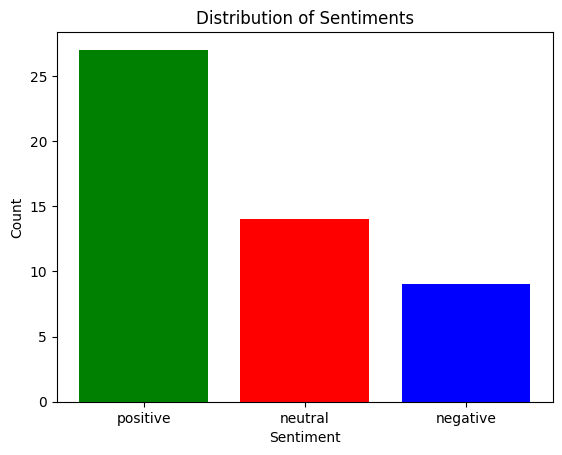

In [5]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plotting the bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()